## 1. Elección del dataset
Hemos elegido como dataset: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers. Que, además de permitirnos aplicar lo aprendido en la asignatura, también nos diese unos resultados con algo de significado. Así, tendríamos la comparación de qué tan bueno es el modelo, pudiendo sacar una conclusión lógica de una predicción "razonable". 
Este dataset se centra principalmente en la predicción, dentro de un banco, de clientes que cancelan sus servicios (tarjetas de crédito en concreto) para así, retenerles con incentivos o ventajas antes de que dejen de contar con dichos servicios. 

La desventaja de este dataset es que cuenta con solo el 16,07% de clientes que anularon sus tarjetas. Sin embargo, aunque para el problema real pueda ser insuficiente, nosotros consideramos que, gracias a la cantidad de datos, nos puede servir bastante bien para entender las relaciones entre distintas variables y, con ello, sacar una predicción buena. Además, nosotros buscaremos predecir el rango de ingresos en función de las demás variables.

In [32]:
# Importación de librerías y lectura del dataset
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib as mp # type: ignore

url = "https://raw.githubusercontent.com/pabloruizburgos/AA/refs/heads/main/data/BankChurners.csv"
datos = pd.read_csv(url)
datos

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## 2 Estudio del dataset
Aquí realizaremos un preprocesado completo de nuestros datos para "prepararlos" para que sirvan para entrenar nuestro modelo. Hay que tener en cuenta que nuestro modelo será de clasificación y, con esto, realizar los cambios pertinentes en nuestro data frame.

Los rangos de ingresos son:  ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
La moda del income es: Less than $40K
La moda (0 = F, 1 = M) de genero con unkown income es:  0    0
Name: Gender, dtype: int64
La moda de estudios con unkown income es:  0    Graduate
Name: Education_Level, dtype: object
La moda de Income de mujeres graduate es de:  0    Less than $40K
Name: Income_Category [CLASE], dtype: object
Los nuevos datos unicos son:  ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
Los datos unicos de Educacion son:  ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
La moda de Education_Levele es: 0    Graduate
Name: Education_Level, dtype: object
       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      7139821

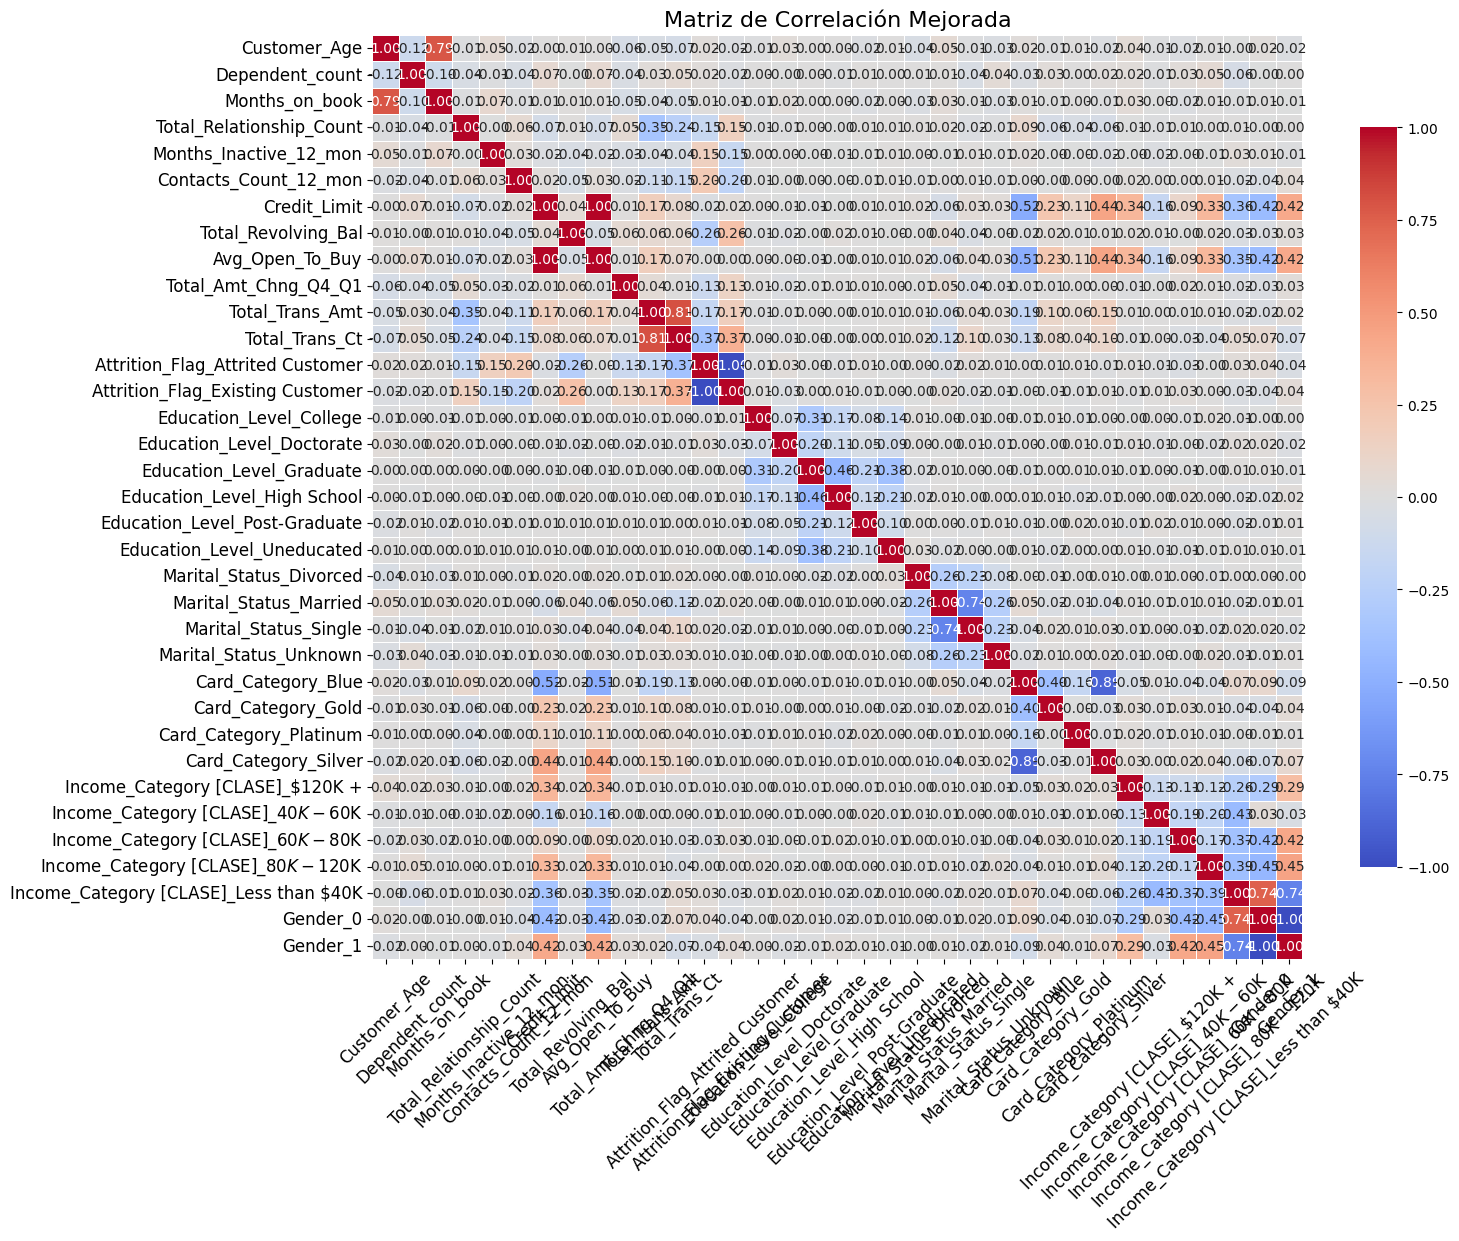

In [33]:
# Como ya sabemos nuestra variable a predecir, le añadimos en su nombre: [CLASE]
datos.rename(columns={'Income_Category': 'Income_Category [CLASE]'}, inplace=True)

# Eliminamos el nº de cliente ya que no ayuda a predecir nada
# Solo serviría de identificador para la fila, pero contamos con el nº de fila ya
datos_limpios = datos.drop(columns = ['CLIENTNUM'])
# Ya que vamos a predecir los ingresos, las predicciones ya existentes no nos sirven
datos_limpios = datos_limpios.drop(datos_limpios.columns[-2:], axis = 1)
# Con 'total transaction amount' y 'total transaction count', no vemos necesario el uso de las que ahora son las dos últimas columnas
# Para relacionar ingresos con gastos asociados a sus tarjetas nos sirve así
datos_limpios = datos_limpios.drop(datos_limpios.columns[-2:], axis = 1) 

## Necesario?? 
#datos_limpios = datos_limpios.replace({'Gender' : {'F' : 0, 'M' : 1}})
# como en la col 'gender' solo hay 'F' y 'M' (comprobado via: print(f'unique of gender: {datos_limpios["Gender"].unique()}'))
# podemos usar map para hacer encoding
datos_limpios['Gender'] = datos_limpios['Gender'].map({'F': 0, 'M': 1})
datos_limpios

print('Los rangos de ingresos son: ',datos_limpios['Income_Category [CLASE]'].unique())
# Vemos que hay valores Unkown, por lo que pasamos a reemplazarlos por la moda de los datos, la calculamos
## Por qué moda en vez de media?? (Explicar)
values, counts = np.unique(datos_limpios['Income_Category [CLASE]'], return_counts=True)
mode = values[np.argmax(counts)]
print(f"La moda del income es: {mode}")

# La moda de Income es menos de 40k, vamos a hacer una visualizacion rápida para ver si los datos de 'unkown
# Income' coinciden con los de 'less than 40k', para ello usaremos la moda de su género y la moda de sus 
# estudios, en caso de que concuerden los sustituiremos ('Unkown' -> 'Less than 40k')
moda_unk_gen = datos_limpios[datos_limpios['Income_Category [CLASE]'] == 'Unknown']['Gender'].mode()
moda_unk_est = datos_limpios[datos_limpios['Income_Category [CLASE]'] == 'Unknown']['Education_Level'].mode()
print('La moda (0 = F, 1 = M) de genero con unkown income es: ' ,moda_unk_gen)
print('La moda de estudios con unkown income es: ', moda_unk_est)

# Vemos que la moda, es decir la mayoría de gente en 'unknown', son mujeres y que la mayoria son 'graduate',
# Por lo tanto, susitituimos los valores de 'unknown', por los valores de moda de las mujeres que sean a su vez 'graduate'.
moda_fem_grad = datos_limpios[(datos_limpios['Gender'] == 0) & (datos_limpios['Education_Level'] == 'Graduate')]['Income_Category [CLASE]'].mode()
print('La moda de Income de mujeres graduate es de: ', moda_fem_grad)

# Vemos que la moda de 'Income' de Mujeres 'Graduate' es también de 'Less than 40k' por lo que sustituimos los 
# valores 'unknown' por 'Less than 40k'
datos_limpios['Income_Category [CLASE]'] = datos_limpios['Income_Category [CLASE]'].replace('Unknown', 'Less than $40K')
datos_limpios_adjusted = datos_limpios

# Comprobamos el cambio
print('Los nuevos datos unicos son: ',datos_limpios_adjusted['Income_Category [CLASE]'].unique())

# Ahora hacemos lo mismo con 'Education_Level'
print('Los datos unicos de Educacion son: ', datos_limpios_adjusted['Education_Level'].unique())
print('La moda de Education_Levele es:', datos_limpios_adjusted['Education_Level'].mode())

# Cambiamos 'unknown' por su moda de dato, que es 'Graduate'
datos_limpios_adjusted['Education_Level'] = datos_limpios_adjusted['Education_Level'].replace('Unknown', 'Graduate')

datos_limpios_adjusted

##########################################################################################

# Calculamos la matriz de correlación (one-hot encoding??)
columnas_categoricas = ['Attrition_Flag', 'Education_Level', 'Marital_Status', 'Card_Category', 'Income_Category [CLASE]', 'Gender']
datos_limpios = pd.get_dummies(datos_limpios, columns = columnas_categoricas)
print(datos)

matriz_correlacion = datos_limpios.corr()
# Visualizar la matriz de correlación de manera chula
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))  # Aumenta el tamaño de la figura
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Matriz de Correlación Mejorada", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()
